<a href="https://www.kaggle.com/code/mikedelong/python-load-and-scatter?scriptVersionId=140919945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from math import log10
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/s-and-p-500-esg-risk-ratings/SP 500 ESG Risk Ratings.csv', thousands=',')
df['log_employees'] = df['Full Time Employees'].apply(log10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 501 non-null    object 
 3   Sector                  501 non-null    object 
 4   Industry                501 non-null    object 
 5   Full Time Employees     496 non-null    float64
 6   Description             501 non-null    object 
 7   Total ESG Risk score    433 non-null    float64
 8   Environment Risk Score  433 non-null    float64
 9   Governance Risk Score   433 non-null    float64
 10  Social Risk Score       433 non-null    float64
 11  Controversy Level       404 non-null    object 
 12  Controversy Score       433 non-null    float64
 13  ESG Risk Percentile     433 non-null    object 
 14  ESG Risk Level          376 non-null    ob

In [2]:
df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,log_employees
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,18000.0,"Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low,4.255273
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,132500.0,"American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN,5.122216
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,40000.0,"Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible,4.602060
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,164000.0,"Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low,5.214844
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,50000.0,"AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium,4.698970


In [3]:
from plotly.express import scatter
scatter(data_frame=df, x='Total ESG Risk score', y='Controversy Score', color='ESG Risk Level', hover_name='Symbol').show()

For the most part ESG risk score and ESG risk level are the same thing and controversy score is unrelated, so this is a boring plot.

In [4]:
scatter(data_frame=df, x='Total ESG Risk score', y='Controversy Score', color='Sector', hover_name='Symbol').show()

Speaking for myself I kind of have to squint to see much of a pattern where sectors are concerned apart from Energy (high) and Real Estate (low). Is that surprising?

In [5]:
scatter(data_frame=df, y='Total ESG Risk score', x='Full Time Employees', color='Controversy Score',  hover_name='Symbol', log_x=True).show()

This is more interesting but still not surprising: by plotting the data this way we can see that smaller companies tend to be less controverial than large companies regardless of their ESG risk score, partly because controversy probably has a name recognition component built into it that would be hard to adjust for.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



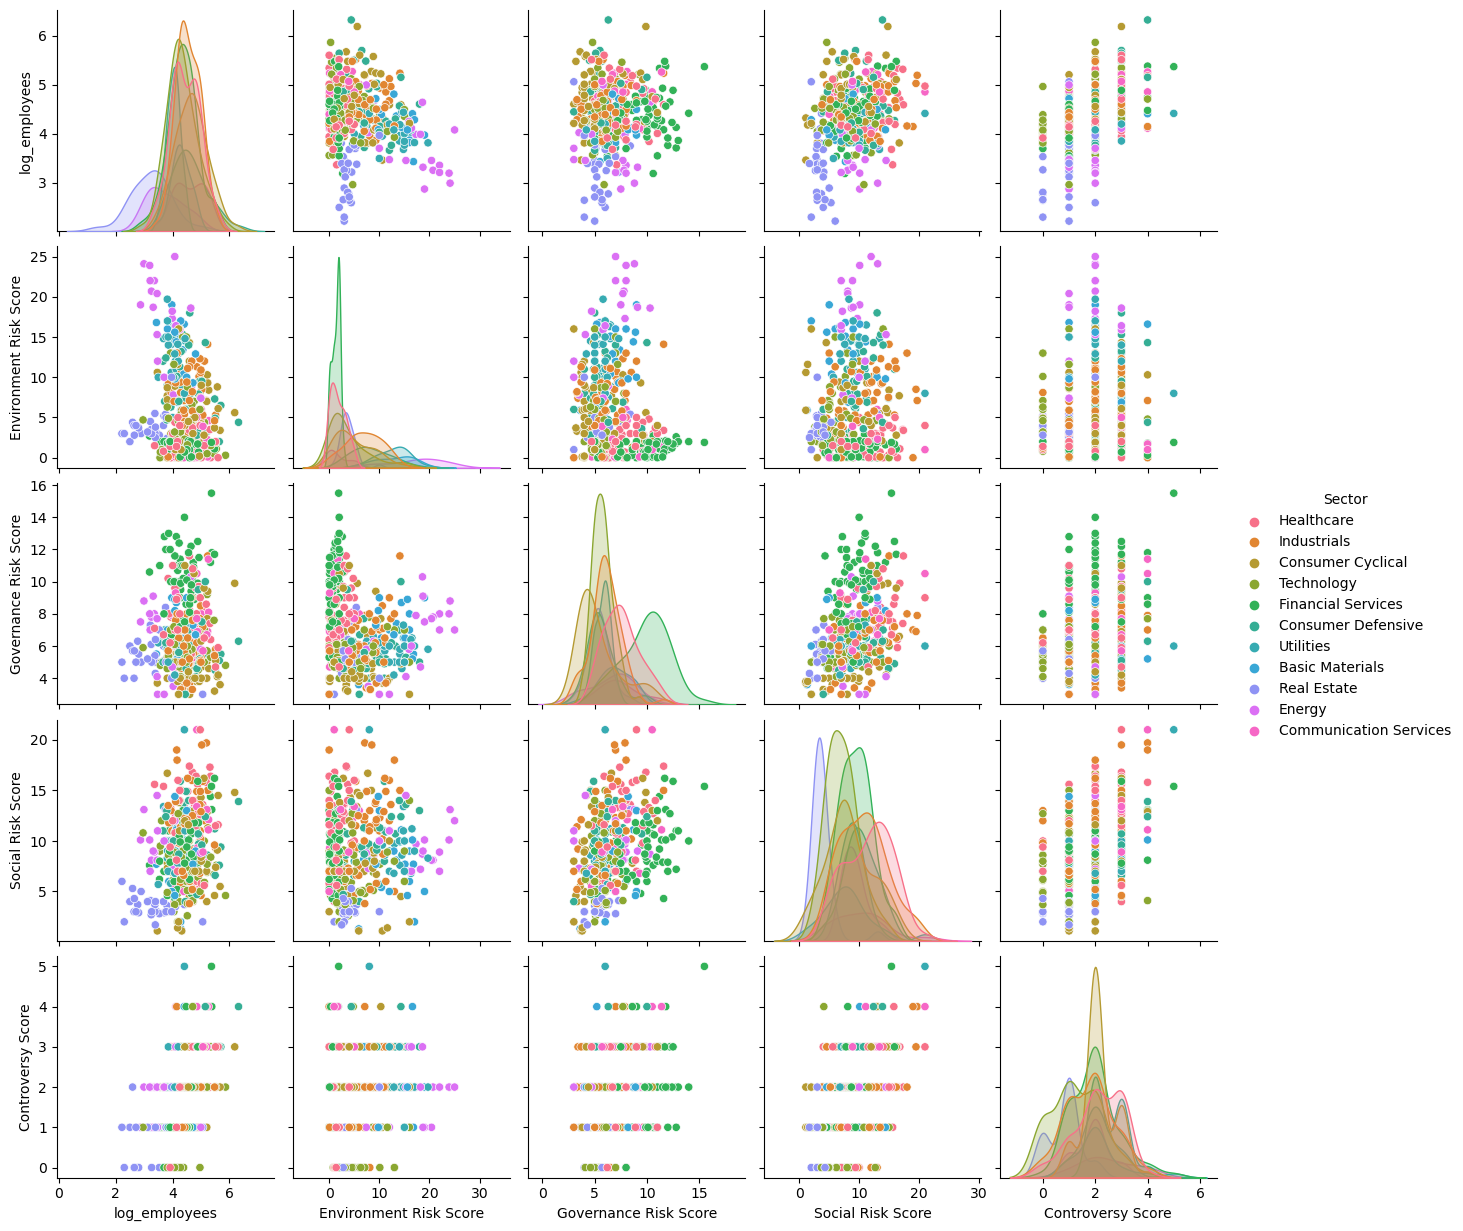

In [6]:
from seaborn import pairplot
columns = ['Sector', 'log_employees'] + [item for item in df.columns if 'Score' in item]
pairplot(data=df[columns], hue='Sector')